In [1]:
import pandas as pd

# Cleaning

In [2]:
data_df= pd.read_csv('for_1_year_old_develop.csv')
data_df

Unnamed: 0                                            Listing  \
0              0  , preview full size imageTEMI 5-in-1 Construct...   
1              1  , preview full size imageToddler Busy Board Mo...   
2              2  , preview full size imageEducational Toys for ...   
3              3  , preview full size imageBaby Balance Bike Toy...   
4              4  , preview full size imageToddler Montessori To...   
...          ...                                                ...   
3395          45  , preview full size imageEducational Learning ...   
3396          46  , preview full size imageKids Toys for 3 2 1 Y...   
3397          47  , preview full size imageZMZS First Birthday T...   
3398          48  , preview full size image Baby Balance Bike fo...   
3399          49  , preview full size imageKids Boy Girl Educati...   

                              Actions     Avg Sold Price  \
0     EditSell SimilarExclude listing  $31.81Fixed price   
1     EditSell SimilarExclude listing  $19.46Fixed price   
2     EditSell SimilarExclude listing  $11.36Fixed price   
3     EditSell SimilarExclude listing  $45.50Fixed price   
4     EditSell SimilarExclude listing   $8.97Fixed price   
...                               ...                ...   
3395              EditExclude listing  $24.99Fixed price   
3396              EditExclude listing  $22.83Fixed price   
3397              EditExclude listing  $32.50Fixed price   
3398              EditExclude listing  $70.59Fixed price   
3399              EditExclude listing   $9.19Fixed price   

                 Avg Shipping  Total Sold  Item_Sale Bids Date Last Sold  
0     $0.00100% Free shipping           3     $95.43    –   Mar 20, 2024  
1     $0.00100% Free shipping          15    $291.83    –   Mar 20, 2024  
2     $0.00100% Free shipping          61    $693.21    –   Mar 20, 2024  
3     $0.00100% Free shipping           1     $45.50    –   Mar 20, 2024  
4     $0.00100% Free shipping           4     $35.86    –   Mar 20, 2024  
...                       ...         ...        ...  ...            ...  
3395  $0.00100% Free shipping           2     $49.98    –    Jan 5, 2022  
3396  $0.00100% Free shipping           3     $68.49    –    Jan 5, 2022  
3397  $0.00100% Free shipping           5    $162.51    –    Jan 5, 2022  
3398  $0.00100% Free shipping           2    $141.17    –    Jan 5, 2022  
3399   $1.9993% Free shipping         660  $6,066.20    –    Jan 5, 2022  

[3400 rows x 9 columns]

In [3]:


# Function to extract and format the first part of the string
def extract_and_format(value):
    parts = value.split('%')[0].split('$')[1]
    first_part = parts.strip()
    formatted_value = '{:.2f}'.format(float(first_part[1:]))
    return formatted_value


In [4]:
# Remove commas from all values in the DataFrame
data_df = data_df.replace(',', '', regex=True)
# 
data_df['Avg_Sold_Price'] = data_df['Avg Sold Price'].apply(lambda x: x.split('$')[1].split('F')[0].split('A')[0]).astype(float)

# 
data_df['Total_Sales'] = data_df['Item_Sale'].apply(lambda x: x.split('$')[1]).astype(float)

data_df['Total_Sold'] = data_df['Total Sold'].astype(float)

# Convert string to datetime
data_df['Date'] = pd.to_datetime(data_df['Date Last Sold'])

# Apply the function to the column
data_df['Shipping'] = data_df['Avg Shipping'].apply(lambda x: extract_and_format(x)).astype(float)

data_df.head()

Unnamed: 0                                            Listing  \
0           0   preview full size imageTEMI 5-in-1 Constructi...   
1           1   preview full size imageToddler Busy Board Mon...   
2           2   preview full size imageEducational Toys for 6...   
3           3   preview full size imageBaby Balance Bike Toys...   
4           4   preview full size imageToddler Montessori Toy...   

                           Actions     Avg Sold Price  \
0  EditSell SimilarExclude listing  $31.81Fixed price   
1  EditSell SimilarExclude listing  $19.46Fixed price   
2  EditSell SimilarExclude listing  $11.36Fixed price   
3  EditSell SimilarExclude listing  $45.50Fixed price   
4  EditSell SimilarExclude listing   $8.97Fixed price   

              Avg Shipping  Total Sold Item_Sale Bids Date Last Sold  \
0  $0.00100% Free shipping           3    $95.43    –    Mar 20 2024   
1  $0.00100% Free shipping          15   $291.83    –    Mar 20 2024   
2  $0.00100% Free shipping          61   $693.21    –    Mar 20 2024   
3  $0.00100% Free shipping           1    $45.50    –    Mar 20 2024   
4  $0.00100% Free shipping           4    $35.86    –    Mar 20 2024   

   Avg_Sold_Price  Total_Sales  Total_Sold       Date  Shipping  
0           31.81        95.43         3.0 2024-03-20       0.0  
1           19.46       291.83        15.0 2024-03-20       0.0  
2           11.36       693.21        61.0 2024-03-20       0.0  
3           45.50        45.50         1.0 2024-03-20       0.0  
4            8.97        35.86         4.0 2024-03-20       0.0

In [5]:
data_df.drop(columns=['Unnamed: 0', 'Actions', 'Avg Sold Price', 'Bids', 'Date Last Sold', 'Avg Shipping', 'Item_Sale', 'Total Sold'], inplace=True)
data_df.head()

Listing  Avg_Sold_Price  \
0   preview full size imageTEMI 5-in-1 Constructi...           31.81   
1   preview full size imageToddler Busy Board Mon...           19.46   
2   preview full size imageEducational Toys for 6...           11.36   
3   preview full size imageBaby Balance Bike Toys...           45.50   
4   preview full size imageToddler Montessori Toy...            8.97   

   Total_Sales  Total_Sold       Date  Shipping  
0        95.43         3.0 2024-03-20       0.0  
1       291.83        15.0 2024-03-20       0.0  
2       693.21        61.0 2024-03-20       0.0  
3        45.50         1.0 2024-03-20       0.0  
4        35.86         4.0 2024-03-20       0.0

In [6]:
data_df['Listing'] = data_df['Listing'].apply(lambda x: x.split('image')[-1])

In [7]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download NLTK resources (only need to do this once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    keywords = [word for word, pos in tagged_tokens if pos in ['NN', 'NNS', 'NNP', 'JJ']]
    return keywords


[nltk_data] Downloading package punkt to /Users/evanbruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evanbruno/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
# Apply the function to both listing titles and descriptions
data_df['Title_Keywords'] = data_df['Listing'].apply(extract_keywords)
data_df

Listing  Avg_Sold_Price  \
0     TEMI 5-in-1 Construction Truck for 3-9 Year Ol...           31.81   
1     Toddler Busy Board Montessori Toys for 1 2 3 4...           19.46   
2     Educational Toys for 6 Month 1 2 3 Year Old Bo...           11.36   
3     Baby Balance Bike Toys for 1 Year Old Boy and ...           45.50   
4     Toddler Montessori Toys for 1 2 3 4 Year Old B...            8.97   
...                                                 ...             ...   
3395  Educational Learning Toys for Toddlers Baby Ki...           24.99   
3396  Kids Toys for 3 2 1 Year Old Girls Toys Age 3 ...           22.83   
3397  ZMZS First Birthday Toddler Piano Toys 1 Year ...           32.50   
3398   Baby Balance Bike for 1 Year Old Boy and Girl...           70.59   
3399  Kids Boy Girl Educational Toys For 1-6 Year Ol...            9.19   

      Total_Sales  Total_Sold       Date  Shipping  \
0           95.43         3.0 2024-03-20       0.0   
1          291.83        15.0 2024-03-20       0.0   
2          693.21        61.0 2024-03-20       0.0   
3           45.50         1.0 2024-03-20       0.0   
4           35.86         4.0 2024-03-20       0.0   
...           ...         ...        ...       ...   
3395        49.98         2.0 2022-01-05       0.0   
3396        68.49         3.0 2022-01-05       0.0   
3397       162.51         5.0 2022-01-05       0.0   
3398       141.17         2.0 2022-01-05       0.0   
3399      6066.20       660.0 2022-01-05       1.0   

                                         Title_Keywords  
0     [TEMI, 5-in-1, Construction, Truck, 3-9, Year,...  
1     [Toddler, Busy, Board, Montessori, Toys, Year,...  
2     [Educational, Toys, Month, Year, Old, Boy, Gir...  
3     [Baby, Balance, Bike, Toys, Year, Old, Boy, Gi...  
4     [Toddler, Montessori, Toys, Year, Old, Boys, G...  
...                                                 ...  
3395  [Educational, Learning, Toys, Toddlers, Baby, ...  
3396  [Kids, Toys, Year, Old, Girls, Toys, Age, Dood...  
3397  [ZMZS, First, Birthday, Toddler, Piano, Toys, ...  
3398  [Baby, Balance, Bike, Year, Old, Boy, Girl, Gi...  
3399  [Kids, Boy, Girl, Educational, Toys, 1-6, Year...  

[3400 rows x 7 columns]

# Trends

In [115]:
data_df['Month_Year'] = data_df['Date'].dt.strftime('%B %Y')

avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month_Year').sum()['Total_Sales']

count = data_df.groupby(by='Month_Year').count()['Total_Sales']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')

trend_df

Avg_Sold  Total_Sold  Total_Sales  Count       Date
Month_Year                                                          
January 2022    28.050278       948.0     12593.43     72 2022-01-01
February 2022   31.550682       307.0      7663.01     88 2022-02-01
March 2022      26.879806       461.0      9795.78    103 2022-03-01
April 2022      30.725930       656.0     13154.25     86 2022-04-01
May 2022        24.411471       507.0      6849.27     68 2022-05-01
June 2022       24.415323       266.0      4414.57     62 2022-06-01
July 2022       27.688706       244.0      5404.83     85 2022-07-01
August 2022     23.031711       290.0      4845.08     76 2022-08-01
September 2022  22.531860       527.0      8734.97     86 2022-09-01
October 2022    27.444583       316.0      6004.53     96 2022-10-01
November 2022   28.828590       735.0     15366.04    227 2022-11-01
December 2022   27.532886      1612.0     33838.17    298 2022-12-01
January 2023    25.221047       580.0     12302.01     86 2023-01-01
February 2023   24.250494       312.0      5801.23     81 2023-02-01
March 2023      25.450866       490.0      9202.01    127 2023-03-01
April 2023      25.062330       704.0     11249.80    103 2023-04-01
May 2023        22.141136       435.0      8203.94     88 2023-05-01
June 2023       24.432444       271.0      5131.55     90 2023-06-01
July 2023       24.799231       601.0     12726.83     91 2023-07-01
August 2023     26.787600       276.0      6701.23    100 2023-08-01
September 2023  26.821140       340.0      7513.82    114 2023-09-01
October 2023    25.956204       357.0      6868.19    108 2023-10-01
November 2023   22.811654       959.0     17065.32    254 2023-11-01
December 2023   26.457986      2623.0     51551.28    442 2023-12-01
January 2024    22.710862       668.0     11784.63    116 2024-01-01
February 2024   21.309262      1394.0     22124.43    122 2024-02-01
March 2024      20.806947      1718.0     28500.72    131 2024-03-01

In [116]:
from matplotlib import pyplot as plt

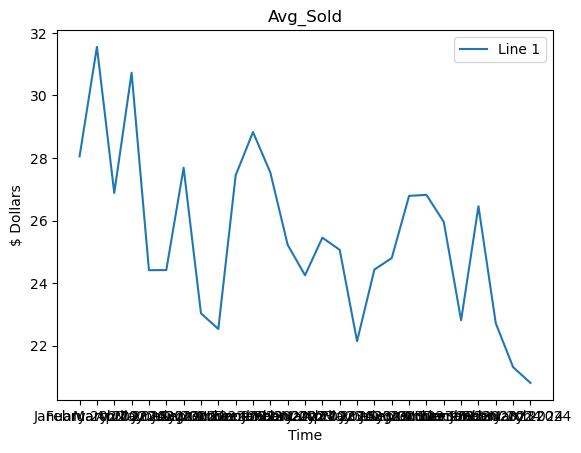

In [117]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Avg_Sold')

# Adding legend
plt.legend()

# Display the plot
plt.show()

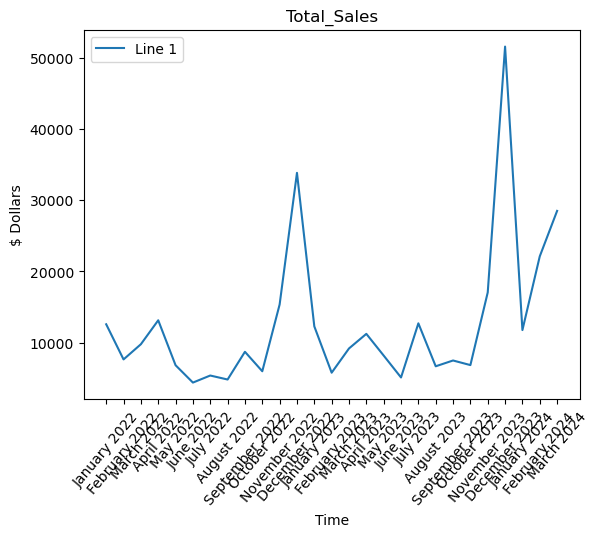

In [120]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Total_Sales'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Total_Sales')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

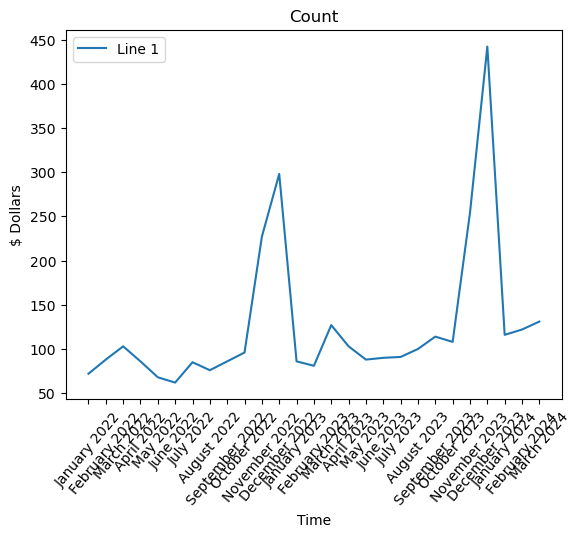

In [121]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Count'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Count')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [13]:
data_df['Month'] = data_df['Date'].dt.month

avg_sold = data_df.groupby(by='Month').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month').sum()['Total_Sales']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales}

trend_df = pd.DataFrame.from_dict(trend_dict)
trend_df

Avg_Sold  Total_Sold  Total_Sales
Month                                    
1      24.901788      2196.0     36680.07
2      25.225017      2013.0     35588.67
3      24.173380      2669.0     47498.51
4      27.639418      1360.0     24404.05
5      23.130769       942.0     15053.21
6      24.425461       537.0      9546.12
7      26.194716       845.0     18131.66
8      25.165739       566.0     11546.31
9      24.976750       867.0     16248.79
10     26.656618       673.0     12872.72
11     25.651247      1694.0     32431.36
12     26.890851      4235.0     85389.45

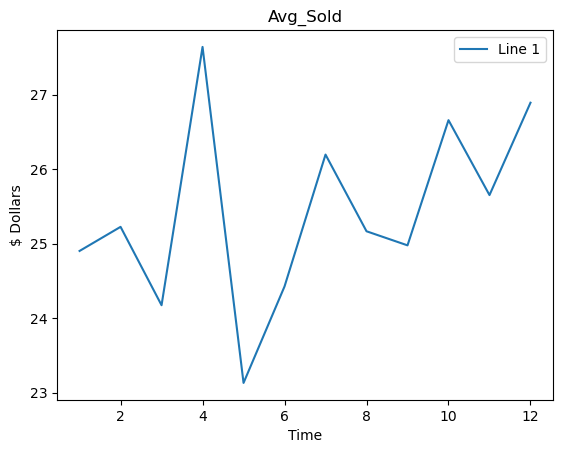

In [14]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Avg_Sold')

# Adding legend
plt.legend()

# Display the plot
plt.show()

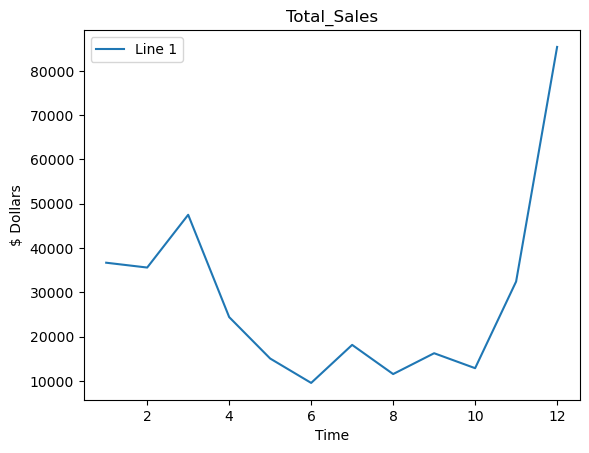

In [15]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Total_Sales'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Total_Sales')

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Product Analysis

In [16]:
filtered_df= data_df.loc[data_df['Avg_Sold_Price'] > 10]
filtered_df.head()

Listing  Avg_Sold_Price  \
0  TEMI 5-in-1 Construction Truck for 3-9 Year Ol...           31.81   
1  Toddler Busy Board Montessori Toys for 1 2 3 4...           19.46   
2  Educational Toys for 6 Month 1 2 3 Year Old Bo...           11.36   
3  Baby Balance Bike Toys for 1 Year Old Boy and ...           45.50   
5  Toddlers Montessori Toys for 1 2 3 Year Old Wo...           14.70   

   Total_Sales  Total_Sold       Date  Shipping  \
0        95.43         3.0 2024-03-20       0.0   
1       291.83        15.0 2024-03-20       0.0   
2       693.21        61.0 2024-03-20       0.0   
3        45.50         1.0 2024-03-20       0.0   
5       147.04        10.0 2024-03-20       0.0   

                                      Title_Keywords  Month_Year  Month  
0  [TEMI, 5-in-1, Construction, Truck, 3-9, Year,...  March 2024      3  
1  [Toddler, Busy, Board, Montessori, Toys, Year,...  March 2024      3  
2  [Educational, Toys, Month, Year, Old, Boy, Gir...  March 2024      3  
3  [Baby, Balance, Bike, Toys, Year, Old, Boy, Gi...  March 2024      3  
5  [Toddlers, Montessori, Toys, Year, Old, Wood, ...  March 2024      3

In [17]:
from collections import Counter
# Flatten the filtered lists
data_df_lists = filtered_df['Title_Keywords'].sum()

# Count the occurrences of each word
word_counts = Counter(data_df_lists)

# Find the most common words
most_common_words = word_counts.most_common()

In [18]:

def extract_phrases(title):
    tokens = title.split()  # Tokenize the title
    phrases = []
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + 6, len(tokens) + 1)):  # Generate combinations of 2 to 5 words
            phrase = ' '.join(tokens[i:j])
            if len(phrase.split()) >= 2 and len(phrase.split()) <= 5:  # Check if phrase length is between 2 and 5
                phrases.append(phrase)
    return phrases

# Apply the function to the Titles column
phrases = filtered_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

Name  Count
0              Year Old   5167
1              Toys for   4003
2                 for 1   3156
3                   1 2   2803
4                   2 3   2521
5                 1 2 3   2465
6            Toys for 1   2355
7                1 Year   1876
8            1 Year Old   1778
9               for 1 2   1608
10             Old Boys   1490
11           for 1 Year   1387
12            for 1 2 3   1354
13              Old Boy   1328
14       for 1 Year Old   1323
15         Year Old Boy   1246
16        Year Old Boys   1197
17         Toys for 1 2   1171
18                  3 4   1162
19               3 Year   1134
20      Toys for 1 Year   1066
21           3 Year Old   1062
22             2 3 Year   1056
23           1 2 3 Year   1038
24  Toys for 1 Year Old   1027

In [ ]:
str_no = 'year|old|1|Year|Old|Toys|for|2|3|4|5|6|12|Months|Boys|Girls'

In [32]:


# Filter rows where the string in the column does not contain certain words
filt_df = most_common_phrases_df[~most_common_phrases_df['Name'].str.contains(r'\b(year|old|1|Year|Old|Toys|for|2|3|4|5|6|12|Months|Boys|Girls|Boy|Girl|Toddlers|Baby)\b')]

filt_df.head(20)

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_5086/1736811920.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filt_df = most_common_phrases_df[~most_common_phrases_df['Name'].str.contains(r'\b(year|old|1|Year|Old|Toys|for|2|3|4|5|6|12|Months|Boys|Girls|Boy|Girl|Toddlers|Baby)\b')]


Name  Count
108         Activity Cube    263
114          Balance Bike    255
132            Busy Board    221
139  Educational Learning    212
207               Toy For    158
224         Drawing Board    145
225              For Kids    144
269        Wooden Sorting    121
276      Birthday Toddler    118
280        First Birthday    117
288           Musical Mat    115
297         Birthday Gift    113
306       Wooden Activity    107
312      Toddler Learning    103
316  Wooden Activity Cube    101
323            Toy Trucks     99
339         Toddler Piano     95
346      Board Montessori     92
352        Birthday Gifts     91
362              Soft Car     89

In [35]:
type_product = filt_df['Name'].head(20).tolist()
type_product

['Activity Cube',
 'Balance Bike',
 'Busy Board',
 'Educational Learning',
 'Toy For',
 'Drawing Board',
 'For Kids',
 'Wooden Sorting',
 'Birthday Toddler',
 'First Birthday',
 'Musical Mat',
 'Birthday Gift',
 'Wooden Activity',
 'Toddler Learning',
 'Wooden Activity Cube',
 'Toy Trucks',
 'Toddler Piano',
 'Board Montessori',
 'Birthday Gifts',
 'Soft Car']

In [36]:
dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}



In [37]:
for phrase in type_product:
    # Filter rows where 'vitamin' or 'Vitamin' is in the list
    temp_df = data_df[data_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    count = temp_df.describe()['Total_Sold'].tolist()[0]

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(count)
    dict_sales['Ship_Cost'].append(ship)
    
pd.DataFrame.from_dict(dict_sales)

Phrase  Avg_Sold_Price_mean  Avg_Sold_Price_25  \
0          Activity Cube            33.131622            22.9600   
1           Balance Bike            43.589437            35.0000   
2             Busy Board            26.795606            17.7050   
3   Educational Learning            18.519483            13.5800   
4                Toy For            17.359667            11.9025   
5          Drawing Board            26.335766            14.1550   
6               For Kids            15.626667            10.6275   
7         Wooden Sorting            18.108676            14.0575   
8       Birthday Toddler            24.874068            18.7850   
9         First Birthday            30.245488            25.0175   
10           Musical Mat            19.935246            12.8800   
11         Birthday Gift            29.840500            19.6350   
12       Wooden Activity            30.994412            23.3675   
13      Toddler Learning            14.653380            10.2600   
14  Wooden Activity Cube            30.538333            23.3225   
15            Toy Trucks            35.915200            28.4650   
16         Toddler Piano            29.311000            26.9700   
17      Board Montessori            25.035600            17.7900   
18        Birthday Gifts            30.172500            17.2075   
19              Soft Car            24.210000            16.5725   

    Avg_Sold_Price_75  Total_Sold  Ship_Cost  
0             41.2650       148.0        0.0  
1             51.9900       142.0        0.0  
2             33.9900       132.0        0.0  
3             21.9775       174.0        0.0  
4             20.8650        90.0        0.0  
5             24.9900       111.0        0.0  
6             19.1350        84.0        0.0  
7             22.1350        68.0        0.0  
8             27.9150        59.0        0.0  
9             31.5825        82.0        0.0  
10            23.8000        61.0        0.0  
11            36.5425       120.0        0.0  
12            34.7975        68.0        0.0  
13            14.6600        71.0        0.0  
14            32.7075        66.0        0.0  
15            41.7775        50.0        0.0  
16            32.9875        50.0        0.0  
17            32.2250        50.0        0.0  
18            36.2425        56.0        0.0  
19            28.8100        50.0        0.0

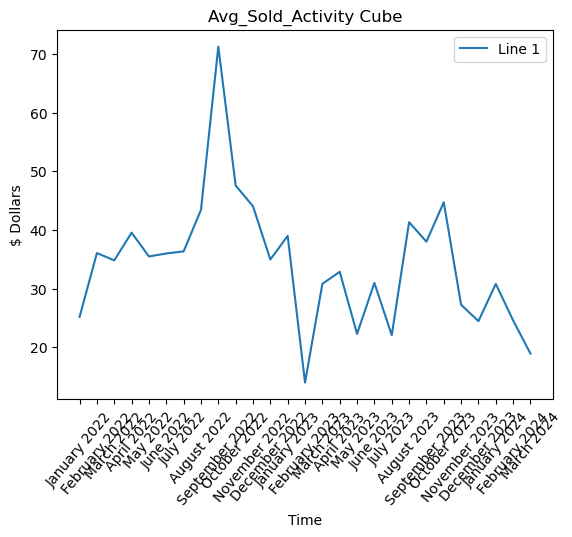

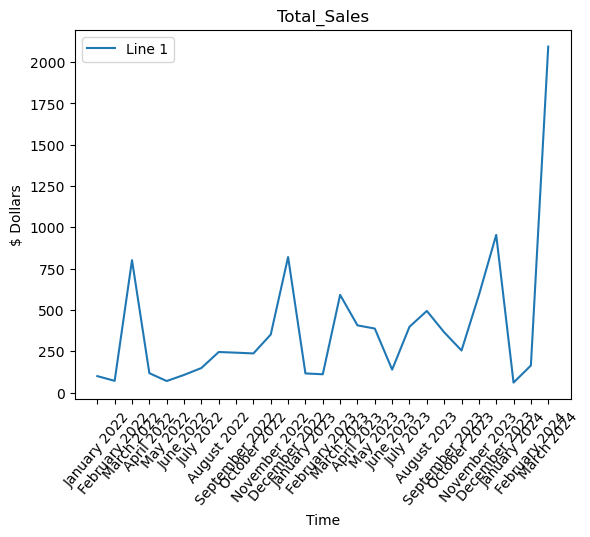

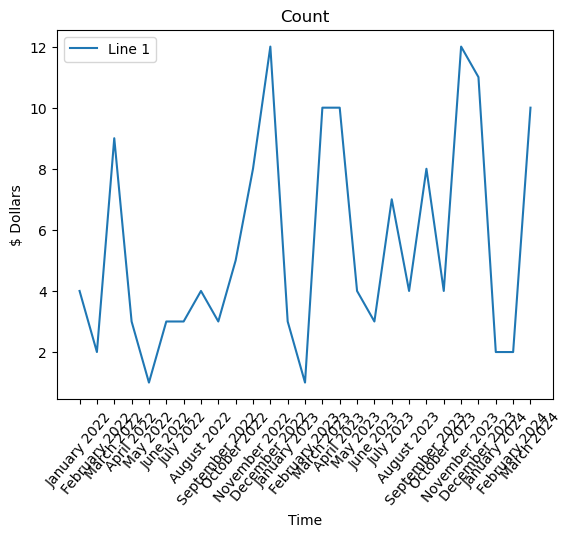

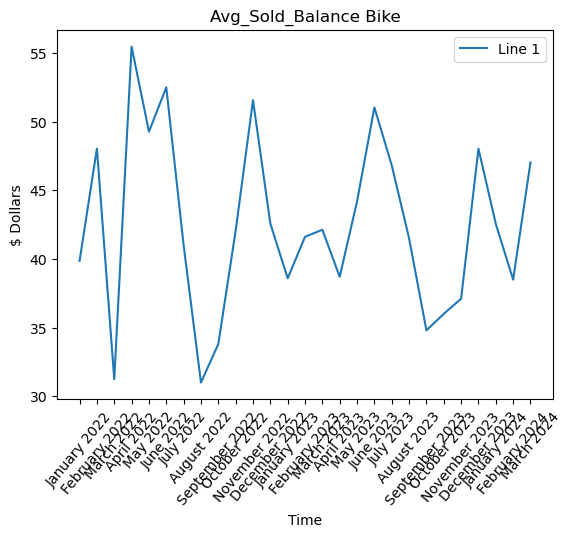

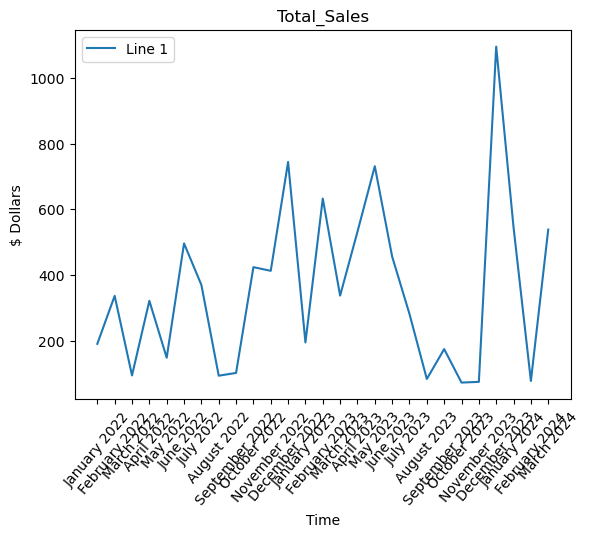

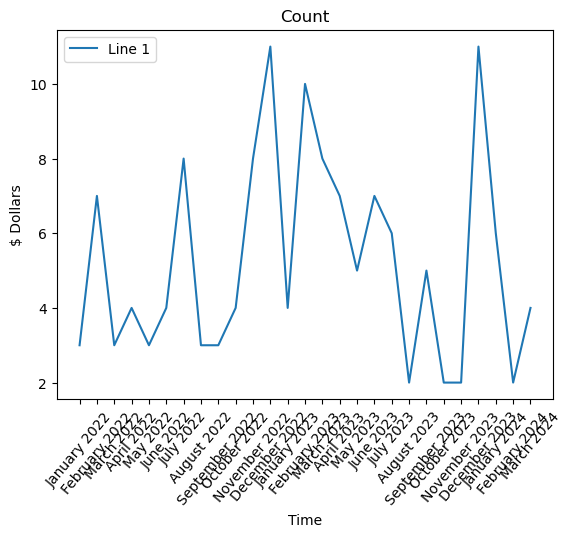

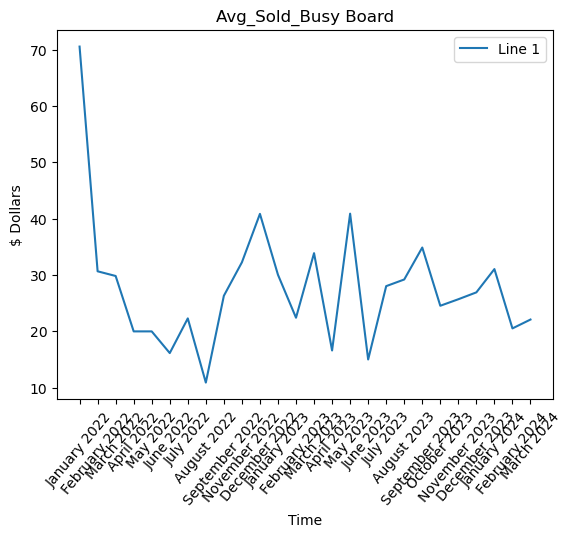

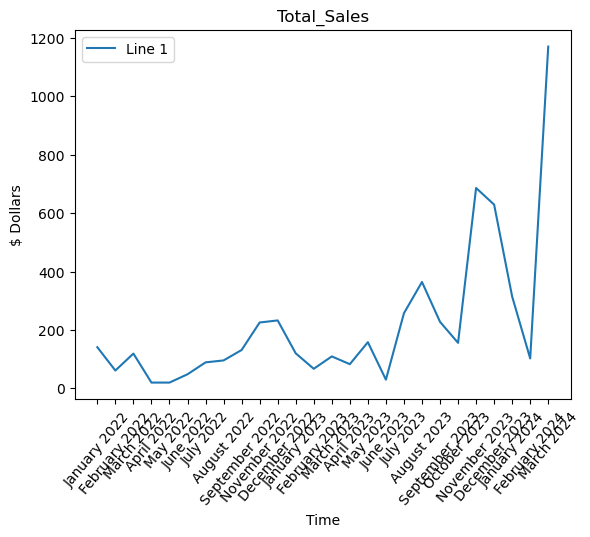

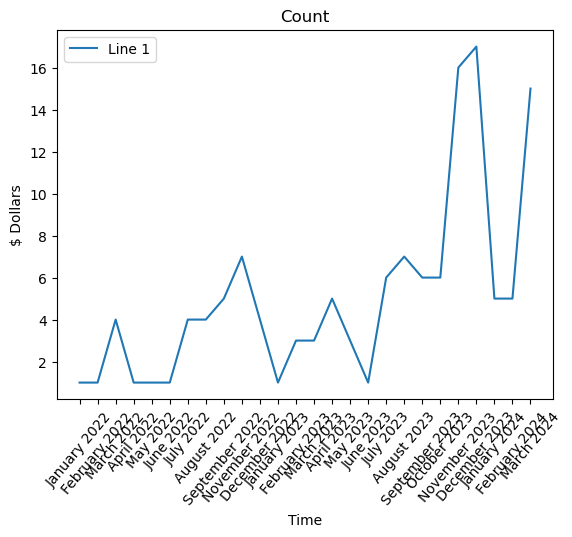

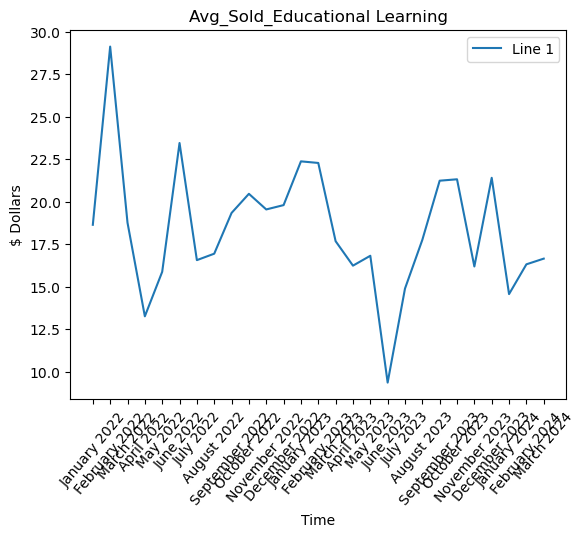

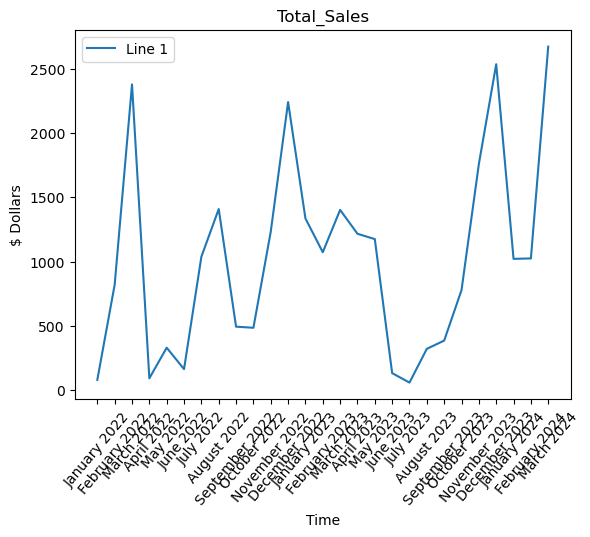

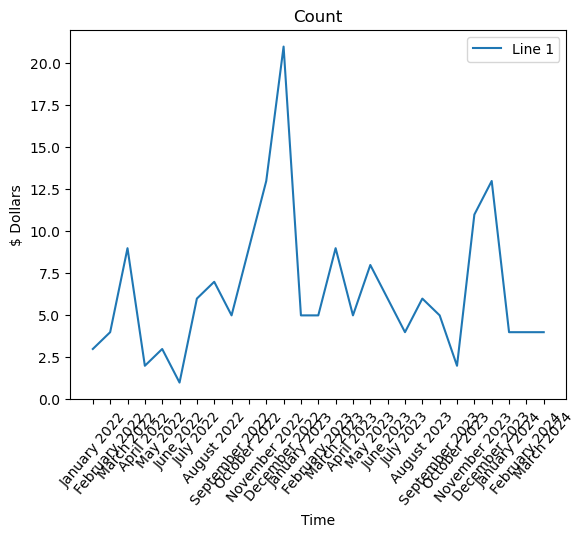

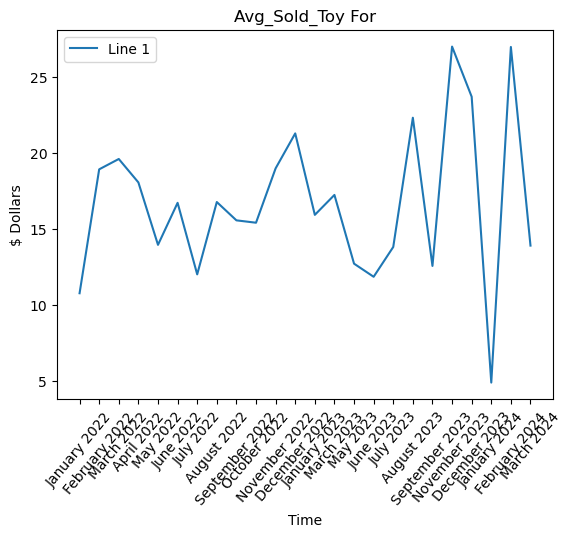

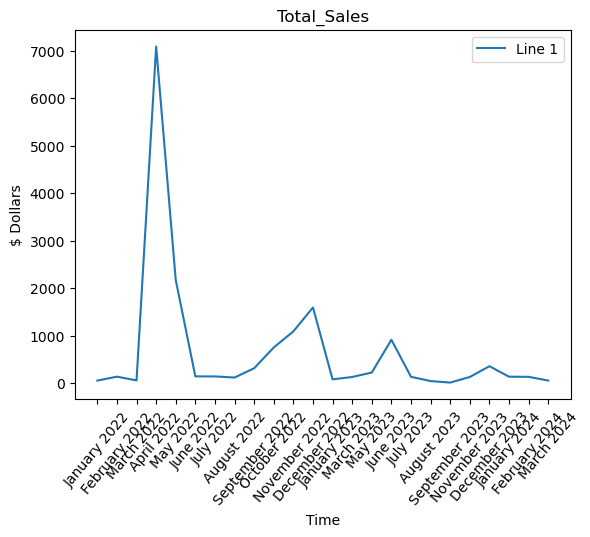

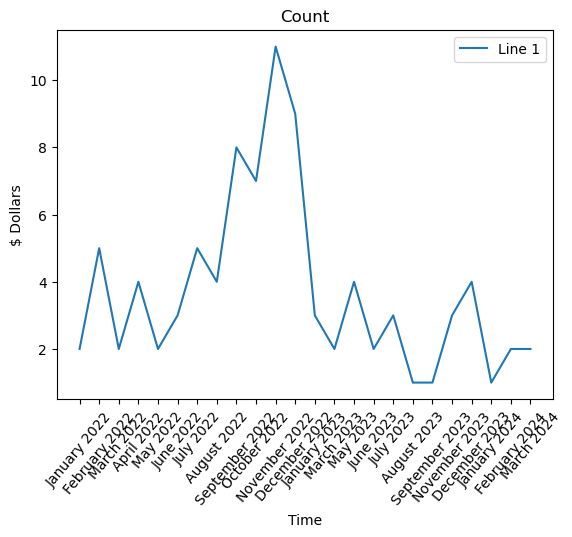

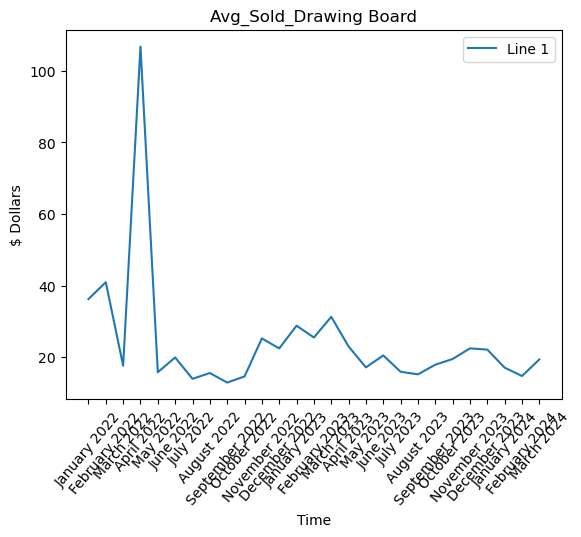

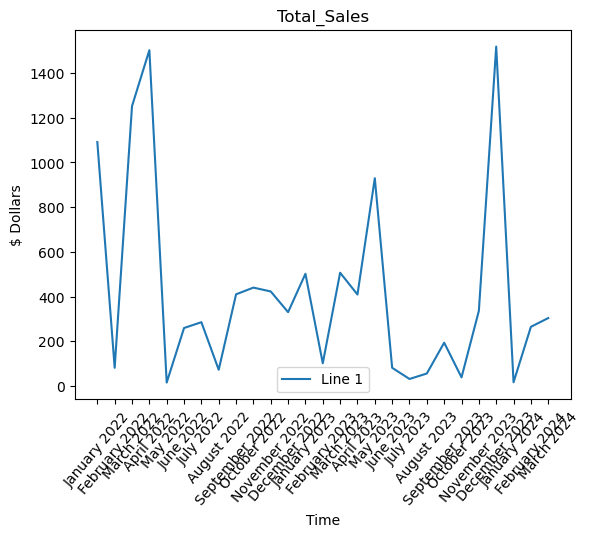

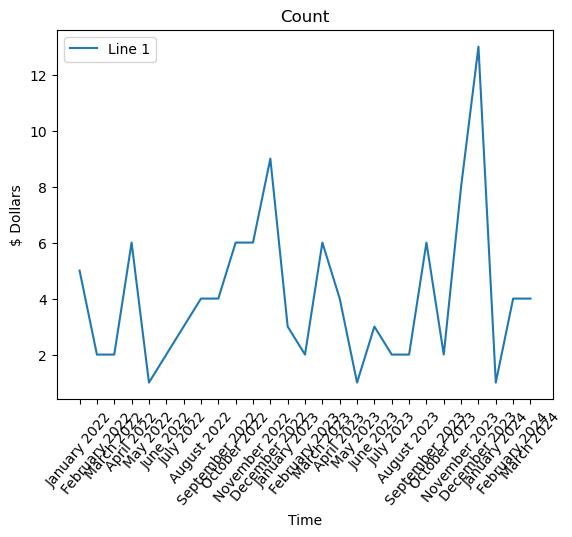

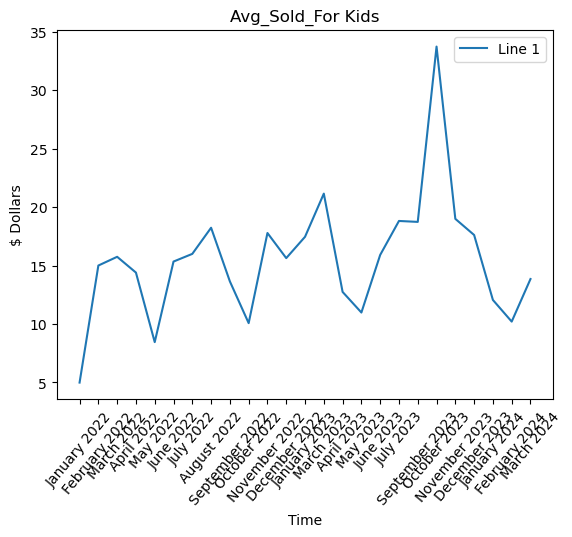

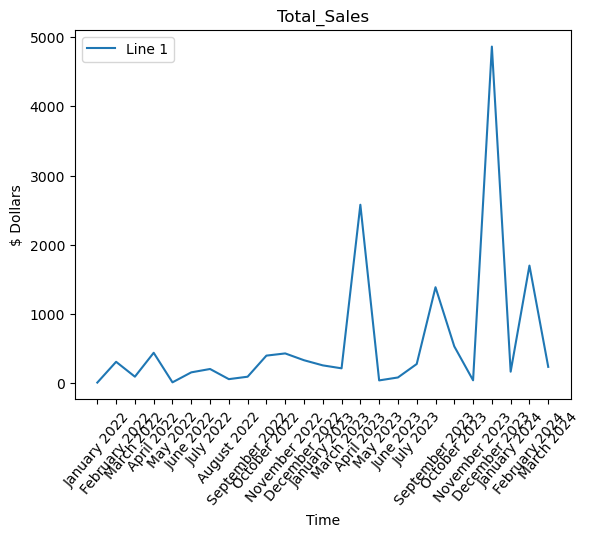

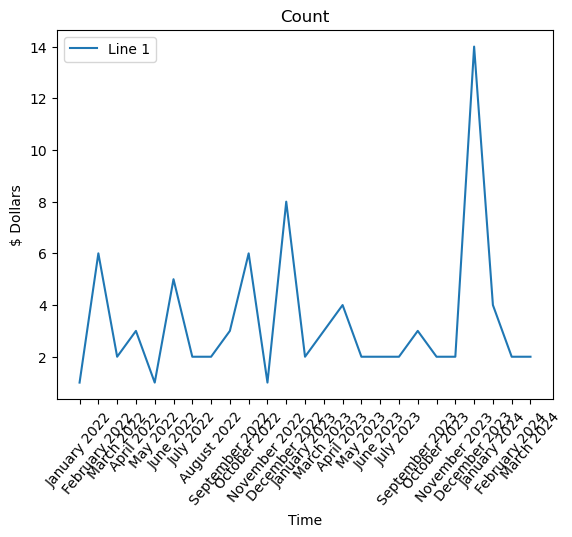

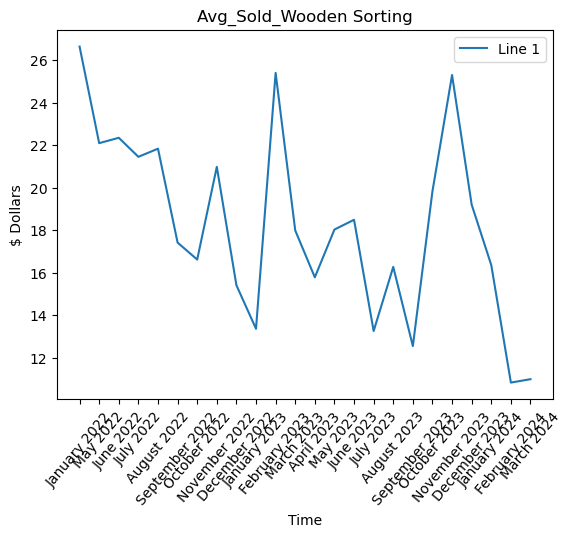

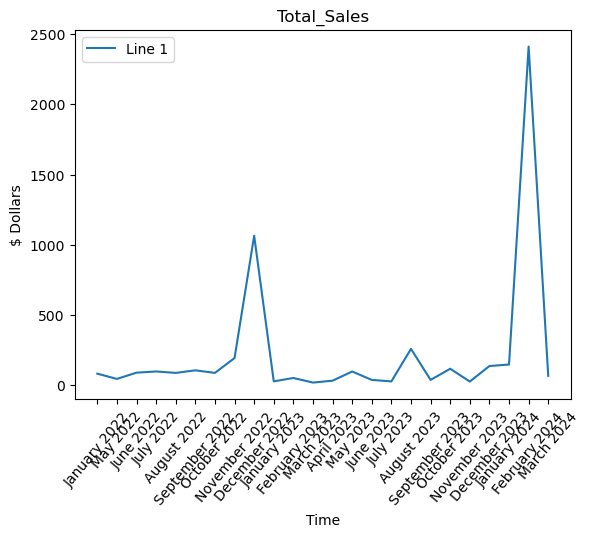

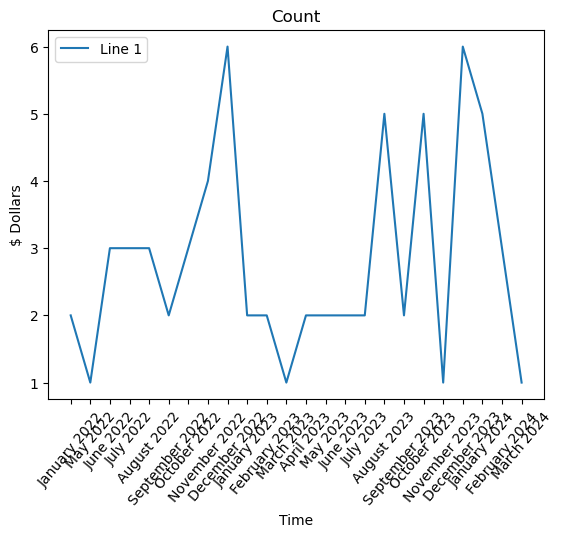

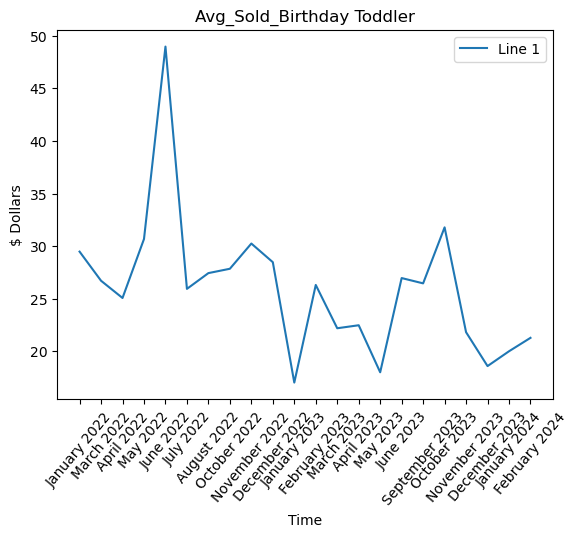

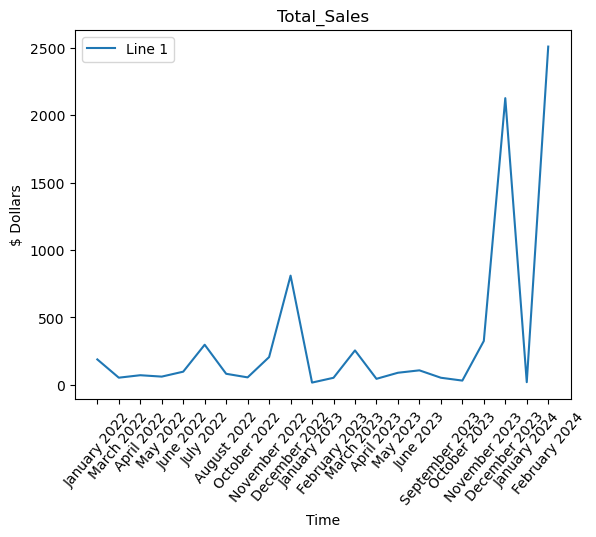

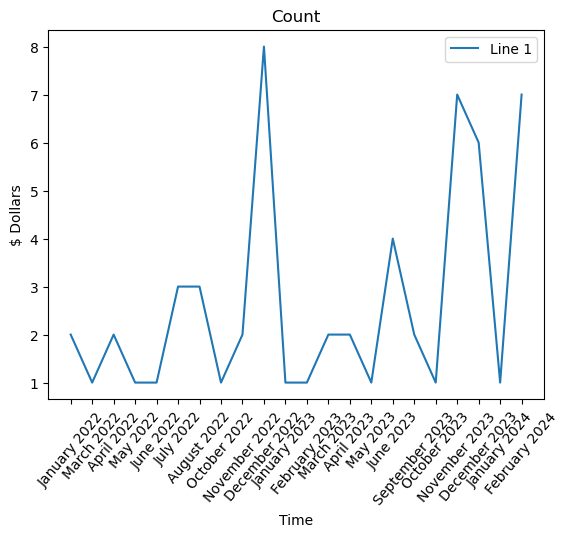

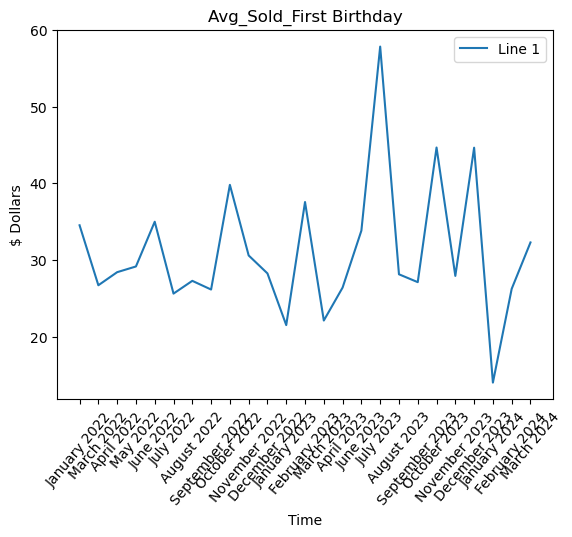

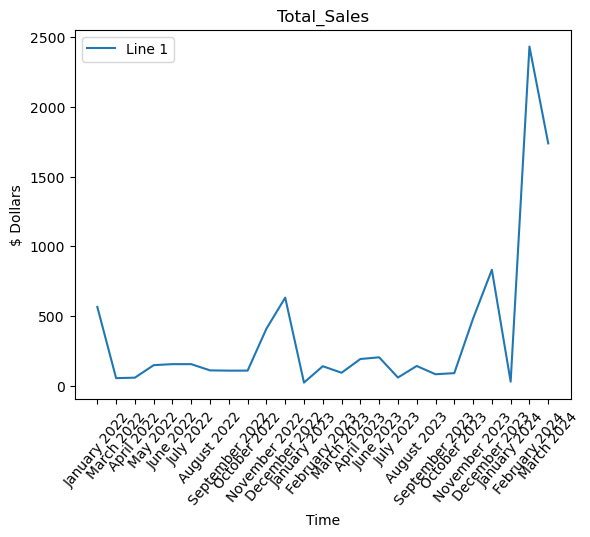

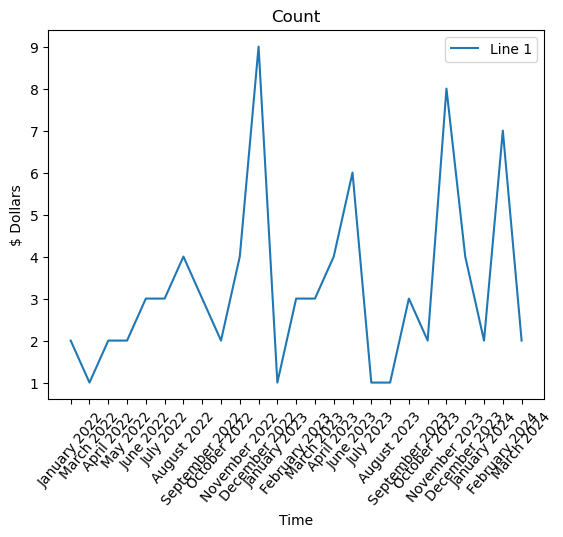

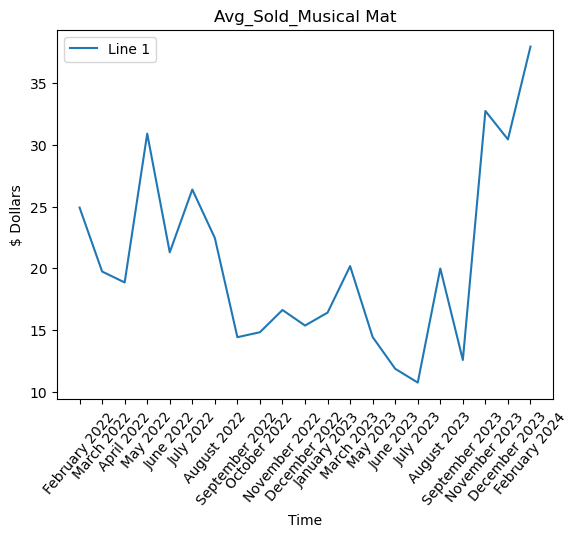

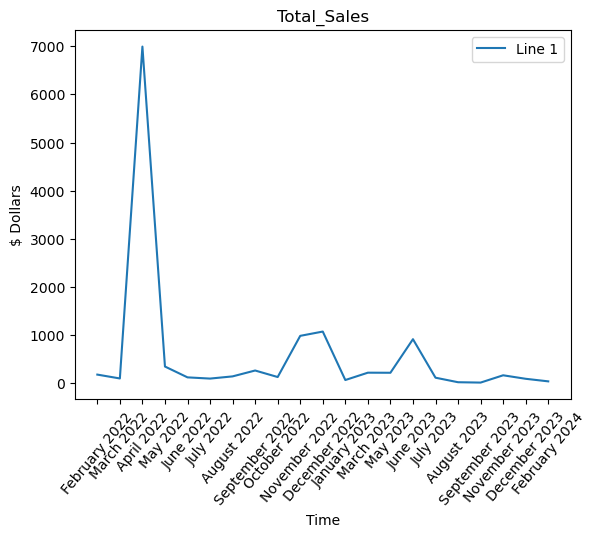

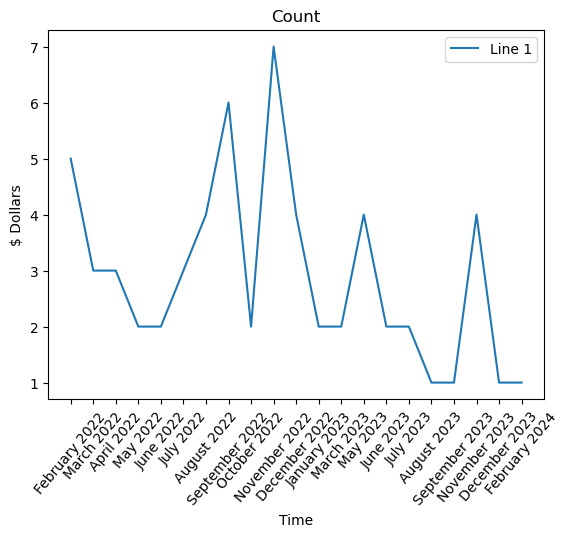

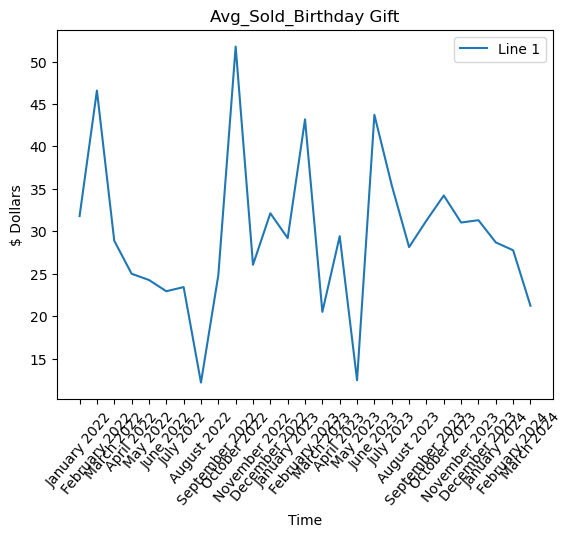

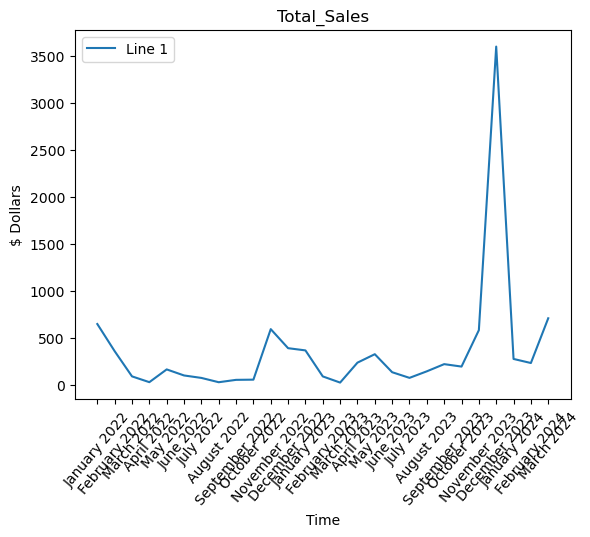

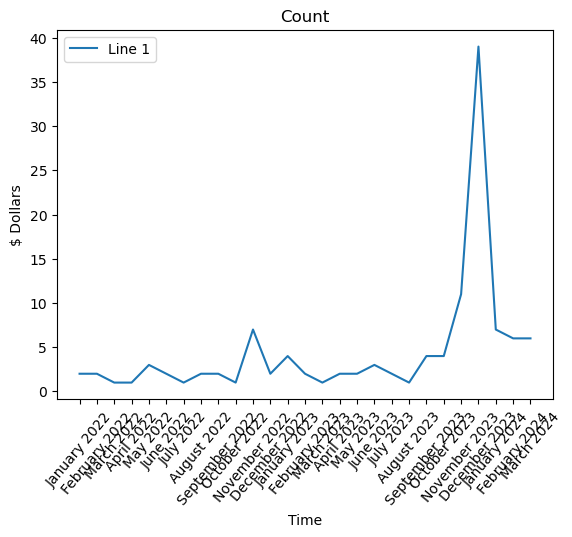

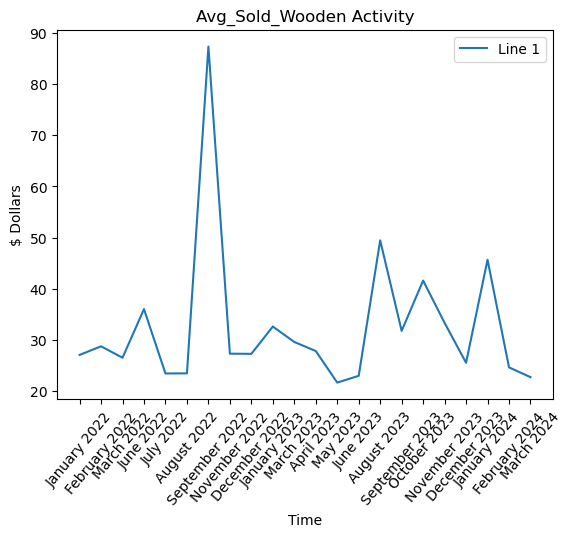

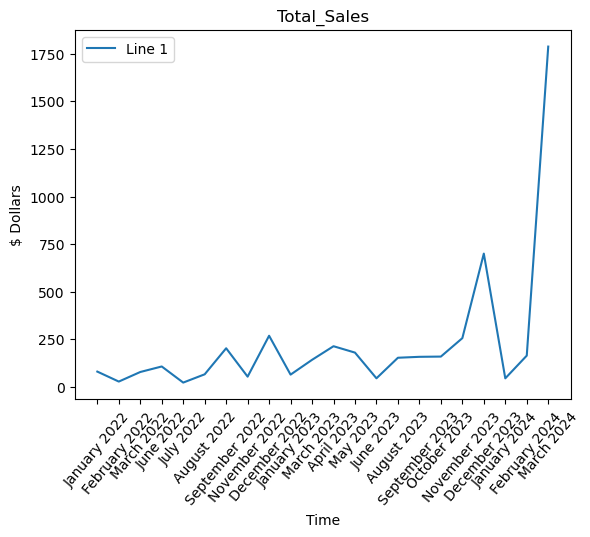

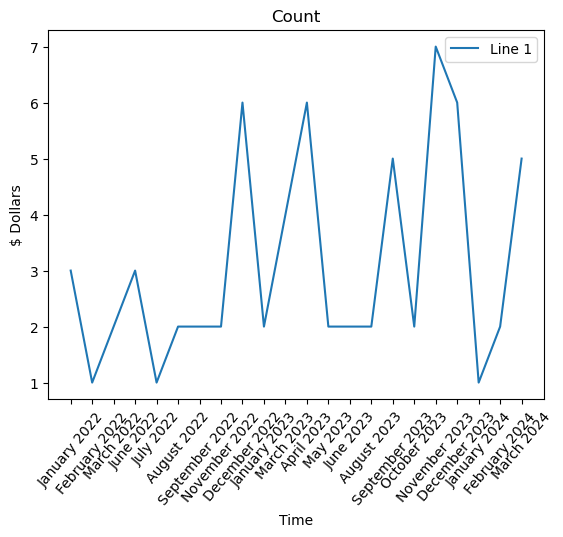

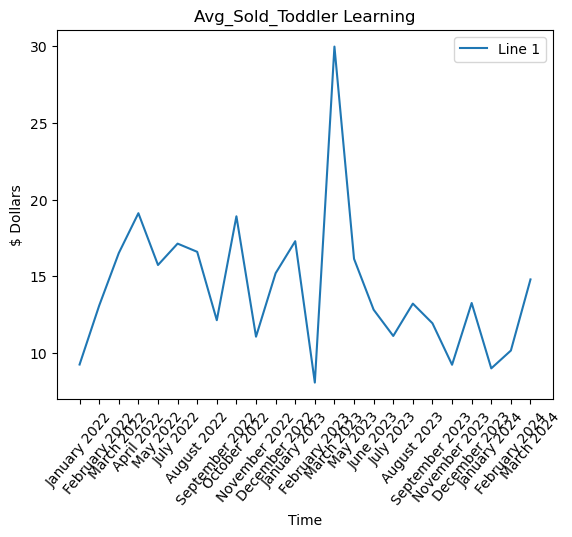

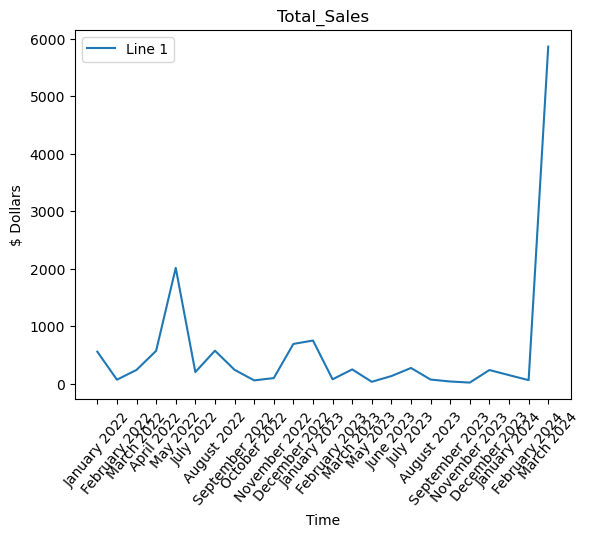

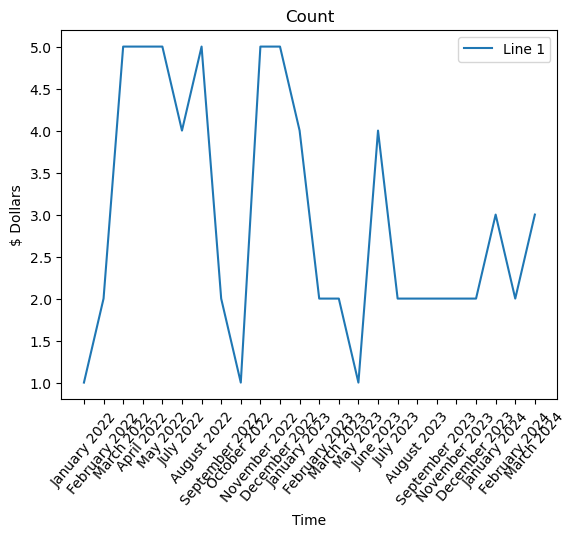

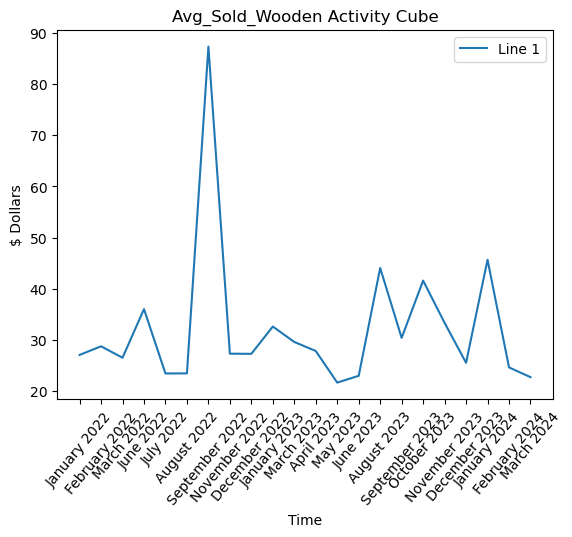

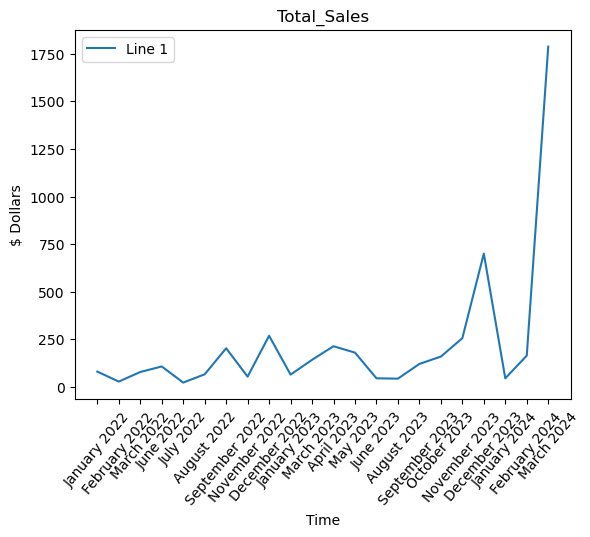

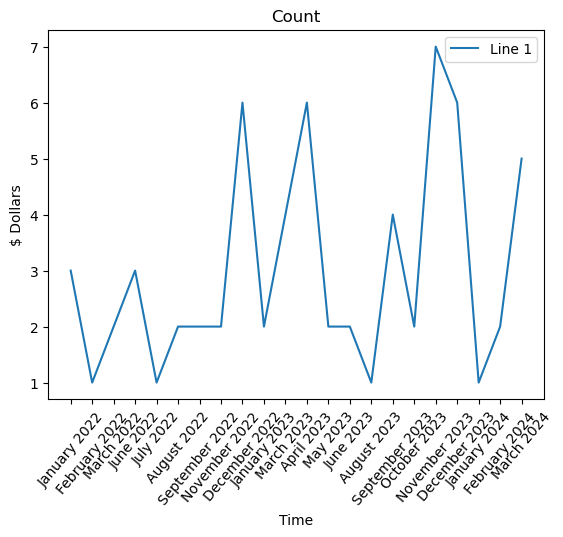

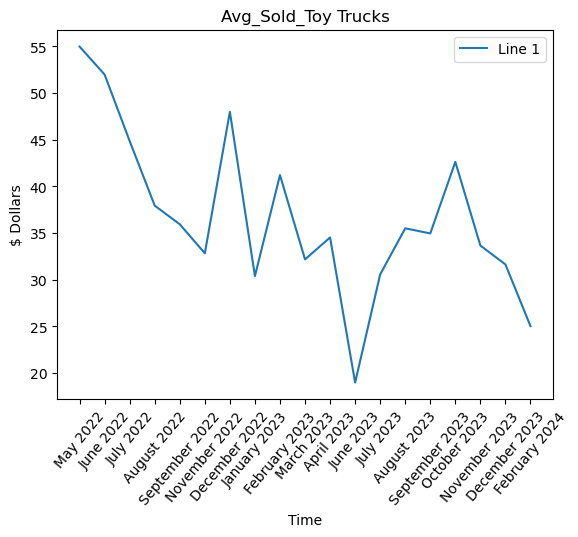

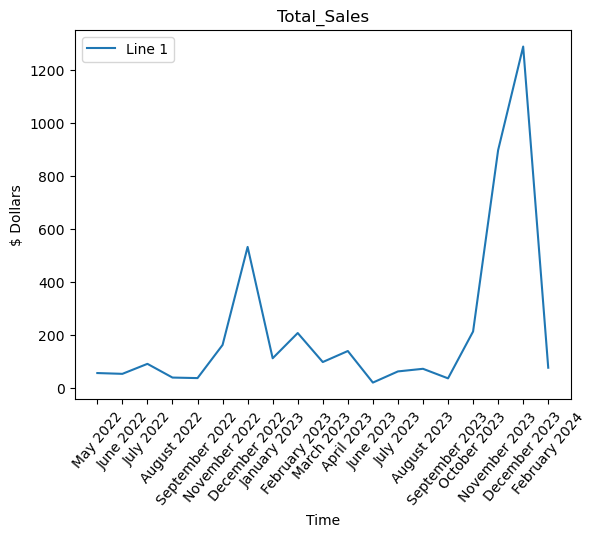

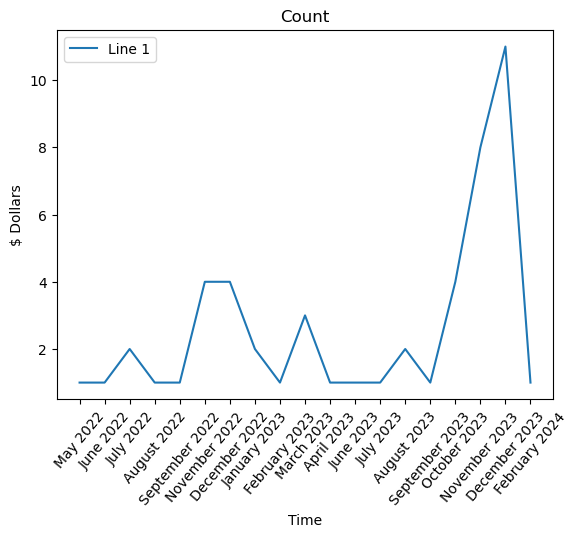

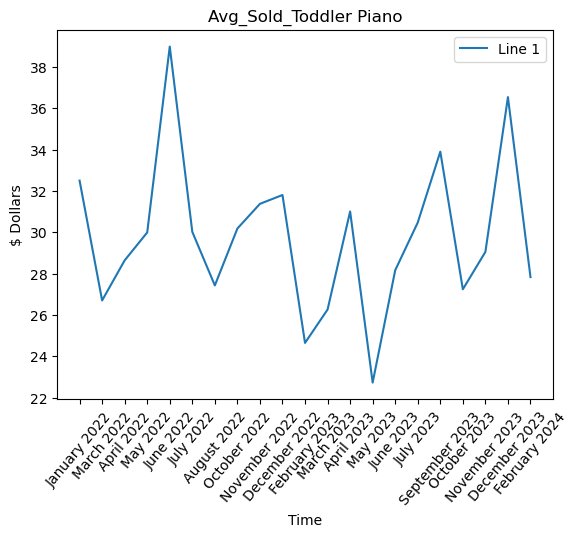

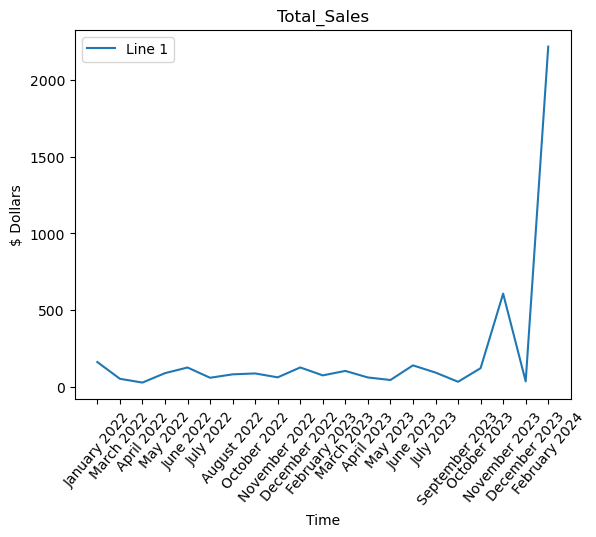

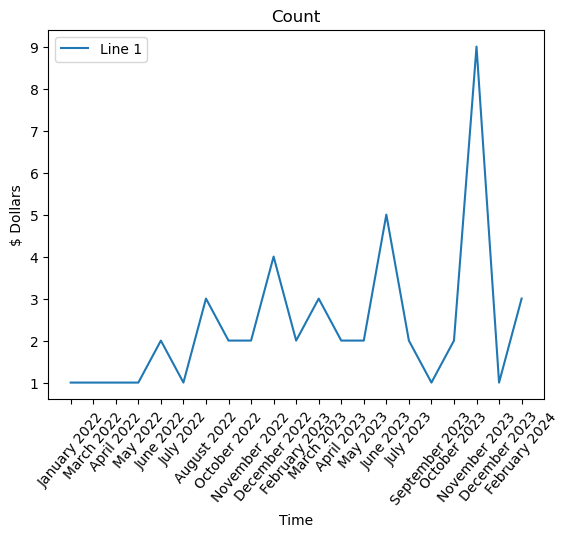

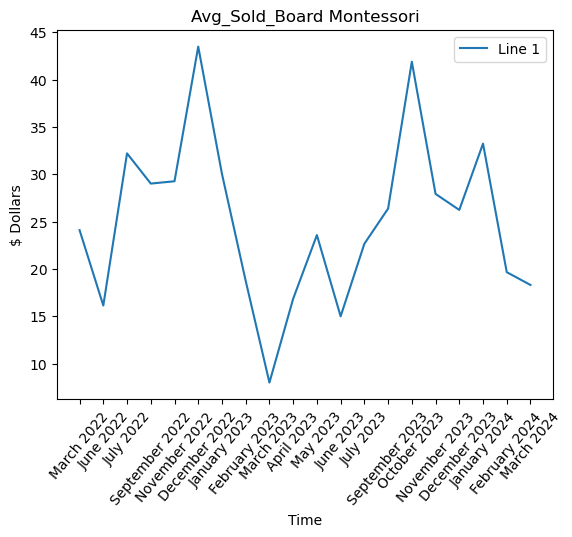

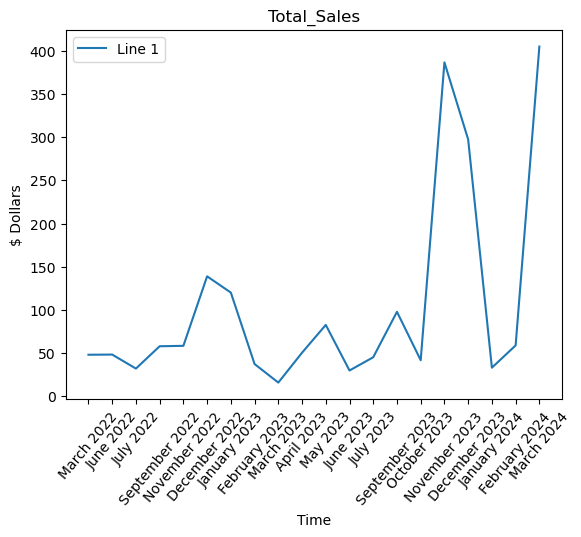

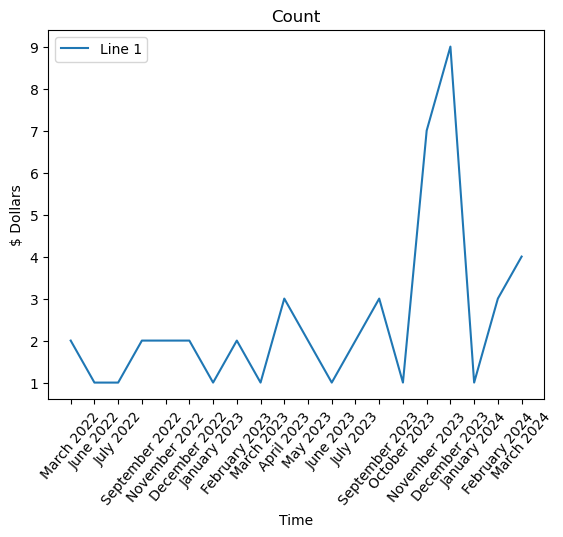

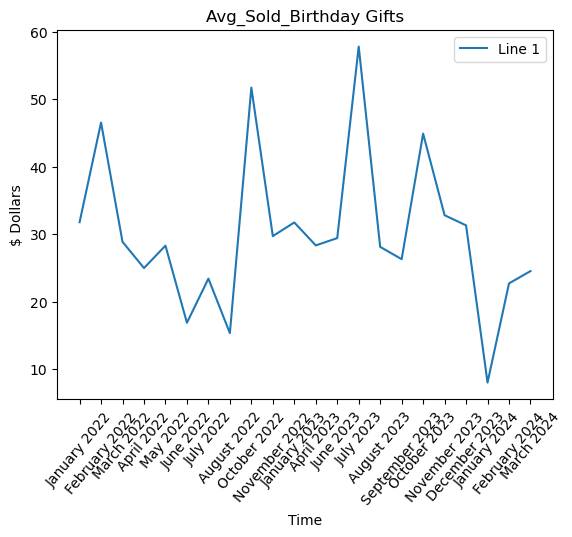

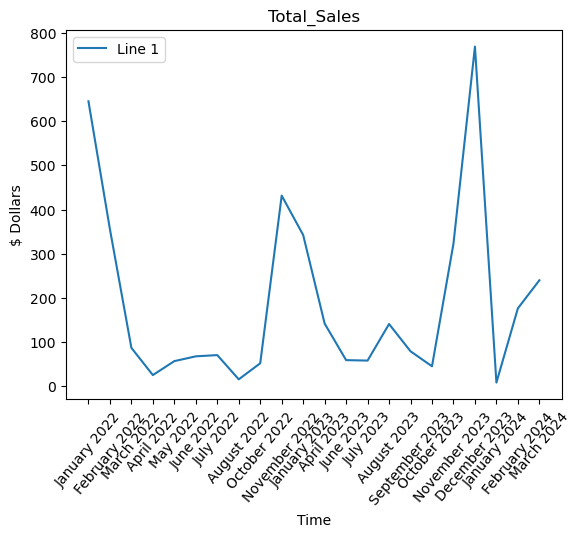

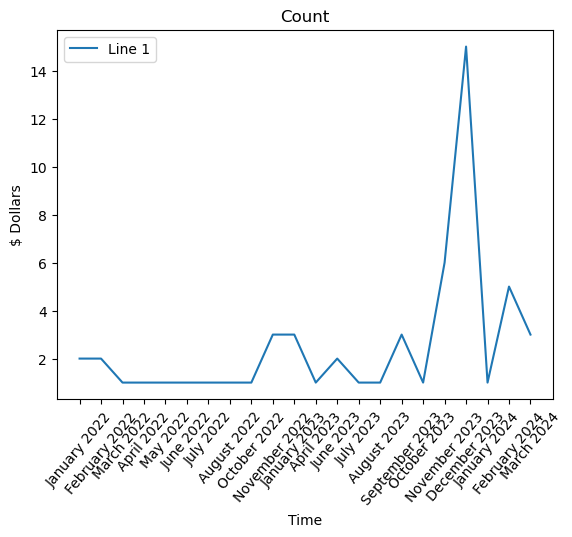

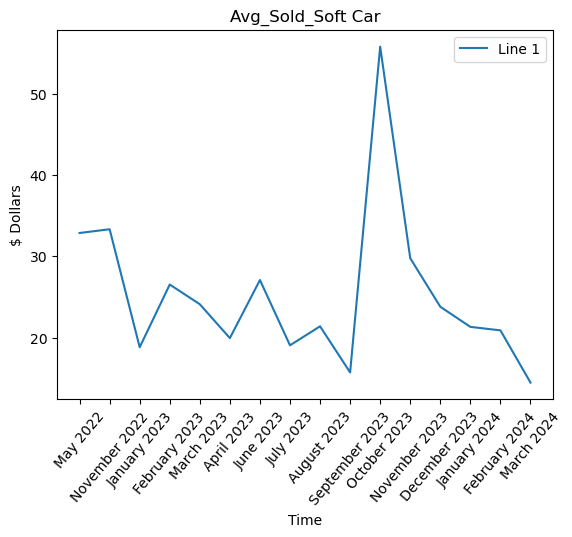

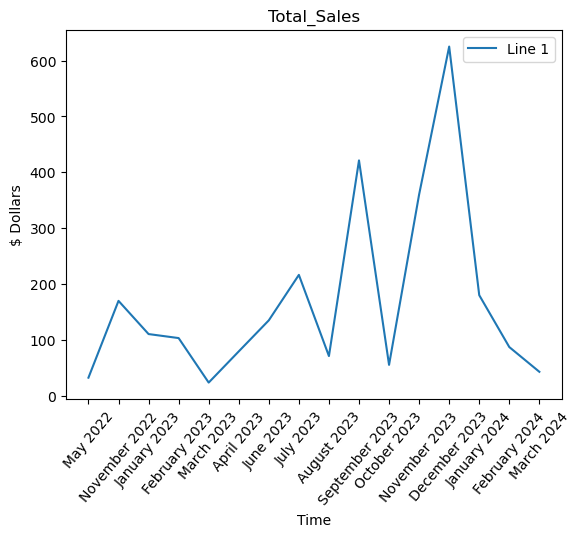

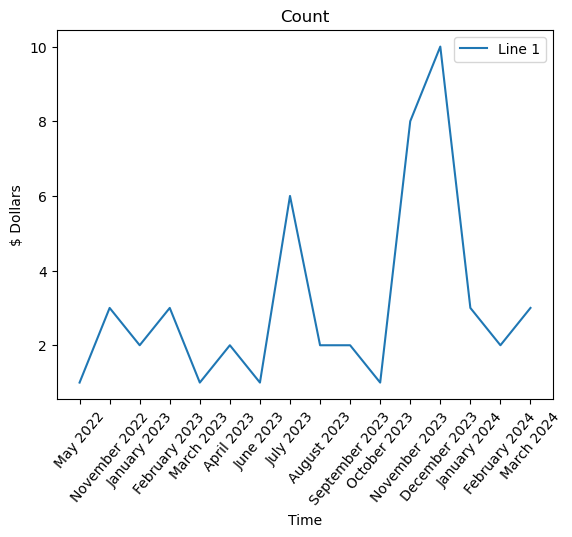

In [127]:
for product in type_product:
    
    filtered_df = data_df[data_df['Listing'].str.contains(product)]

    avg_sold = filtered_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

    total_sold = filtered_df.groupby(by='Month_Year').sum()['Total_Sold']

    total_sales = filtered_df.groupby(by='Month_Year').sum()['Total_Sales']
    
    count = filtered_df.groupby(by='Month_Year').count()['Total_Sales']

    trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count}

    trend_df = pd.DataFrame.from_dict(trend_dict)
    
    trend_df['Date'] = pd.to_datetime(trend_df.index)
    trend_df = trend_df.sort_values(by='Date')
    
    # Plotting the lines
    plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('$ Dollars')
    plt.title(f'Avg_Sold_{product}')
    plt.xticks(rotation=50) 

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()
    
    # Plotting the lines
    plt.plot(trend_df.index, trend_df['Total_Sales'], label='Line 1')

    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('$ Dollars')
    plt.title('Total_Sales')
    plt.xticks(rotation=50) 

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()
    
    # Plotting the lines
    plt.plot(trend_df.index, trend_df['Count'], label='Line 1')

    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('$ Dollars')
    plt.title('Count')
    plt.xticks(rotation=50) 

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()

# Demand Analysis

In [122]:
active = pd.read_csv('active_activity_cube.csv')
active.head()

Unnamed: 0                                            Listing  \
0           0  , preview full size imageTOP BRIGHT Montessori...   
1           1  , preview full size imageAozzy 7-in-1 Wooden A...   
2           2  , preview full size imageNUKied Wooden Activit...   
3           3  , preview full size imageToys for 1 Year Old B...   
4           4  , preview full size imageWooden Activity Cube ...   

            Actions       Avg Sold Price  Watchers Promoted Bids    Start Date  
0  EditSell Similar  $23.96Free shipping         0      NaN    –  Mar 21, 2024  
1  EditSell Similar  $32.63Free shipping         0      NaN    –  Mar 21, 2024  
2  EditSell Similar  $32.63Free shipping         0      NaN    –  Mar 21, 2024  
3  EditSell Similar  $38.38Free shipping         0      NaN    –  Mar 21, 2024  
4  EditSell Similar  $46.43Free shipping         0      NaN    –  Mar 21, 2024

In [123]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download NLTK resources (only need to do this once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    keywords = [word for word, pos in tagged_tokens if pos in ['NN', 'NNS', 'NNP', 'JJ']]
    return keywords


[nltk_data] Downloading package punkt to /Users/evanbruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evanbruno/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [124]:


# Function to extract and format the first part of the string
def extract_and_format(value):
    parts = value.split('%')[0].split('$')[1]
    first_part = parts.strip()
    formatted_value = '{:.2f}'.format(float(first_part[1:]))
    return formatted_value
# Remove commas from all values in the DataFrame
active = active.replace(',', '', regex=True)
# 
active['Avg_Sold_Price'] = active['Avg Sold Price'].apply(lambda x: x.split('$')[1].split('F')[0].split('A')[0].split('+')[0]).astype(float)

# Convert string to datetime
active['Date'] = pd.to_datetime(active['Start Date'])

active['Watchers'] = active['Watchers'].astype(int)

active.drop(columns=['Unnamed: 0', 'Actions', 'Bids', 'Avg Sold Price', 'Promoted', 'Start Date'], inplace=True)

active['Listing'] = active['Listing'].apply(lambda x: x.split('image')[-1])

# Apply the function to both listing titles and descriptions
active['Title_Keywords'] = active['Listing'].apply(extract_keywords)
active

Listing  Watchers  \
0    TOP BRIGHT Montessori Toys for 1 Year Old Boy ...         0   
1    Aozzy 7-in-1 Wooden Activity Cube for Toddler ...         0   
2    NUKied Wooden Activity Cube 5-in-1 Montessori ...         0   
3    Toys for 1 Year Old Boy Birthday Gift 15-in-1 ...         0   
4    Wooden Activity Cube for 1 Year Old Kids Educa...         0   
..                                                 ...       ...   
230  TOP BRIGHT Activity Cube Toys for 1 Year Old G...         6   
231  Activity Cube Toys for Toddlers 12-18 MonthsBa...         0   
232  Wooden Activity Cube Toys for 1 2 Year Old Boy...        51   
233  Activity Cube Toys for 1 Year Old Boy Girl Woo...         1   
234  Activity Cube Toys - Educational Baby Bead Maz...         2   

     Avg_Sold_Price       Date  \
0             23.96 2024-03-21   
1             32.63 2024-03-21   
2             32.63 2024-03-21   
3             38.38 2024-03-21   
4             46.43 2024-03-21   
..              ...        ...   
230           35.50 2021-12-02   
231           20.79 2021-05-31   
232           24.61 2021-05-07   
233           44.85 2021-04-05   
234           41.61 2019-08-03   

                                        Title_Keywords  
0    [TOP, BRIGHT, Montessori, Toys, Year, Old, Boy...  
1    [Aozzy, 7-in-1, Wooden, Activity, Cube, Toddle...  
2    [NUKied, Wooden, Activity, Cube, 5-in-1, Monte...  
3    [Toys, Year, Old, Boy, Birthday, Gift, 15-in-1...  
4    [Wooden, Activity, Cube, Year, Old, Kids, Educ...  
..                                                 ...  
230  [TOP, BRIGHT, Activity, Cube, Toys, Year, Old,...  
231  [Activity, Cube, Toys, Toddlers, 12-18, Months...  
232  [Wooden, Activity, Cube, Toys, Year, Old, Boy,...  
233  [Activity, Cube, Toys, Year, Old, Boy, Girl, W...  
234  [Activity, Cube, Toys, Educational, Baby, Bead...  

[235 rows x 5 columns]

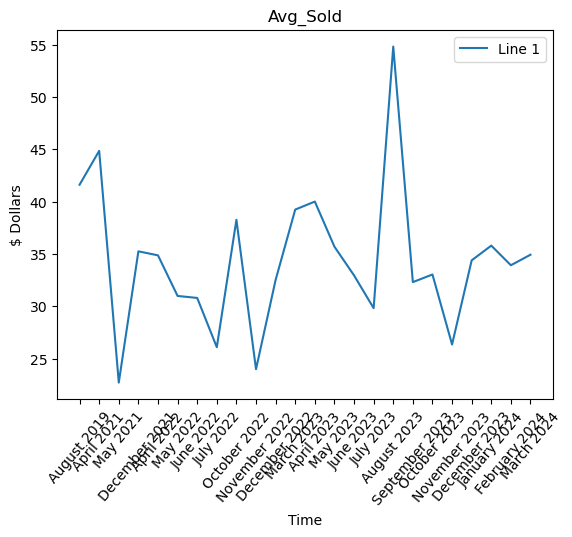

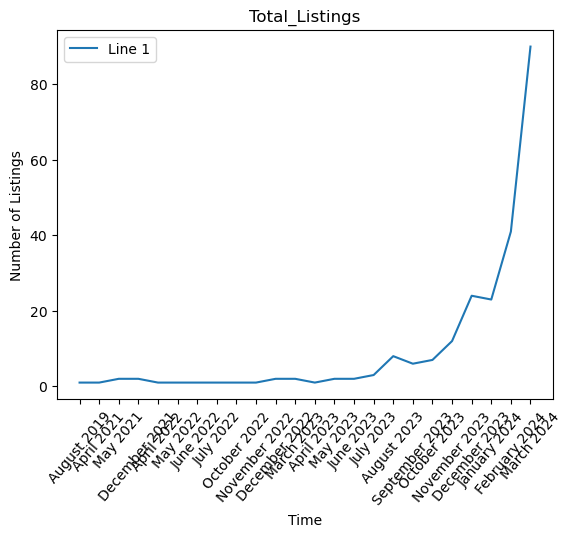

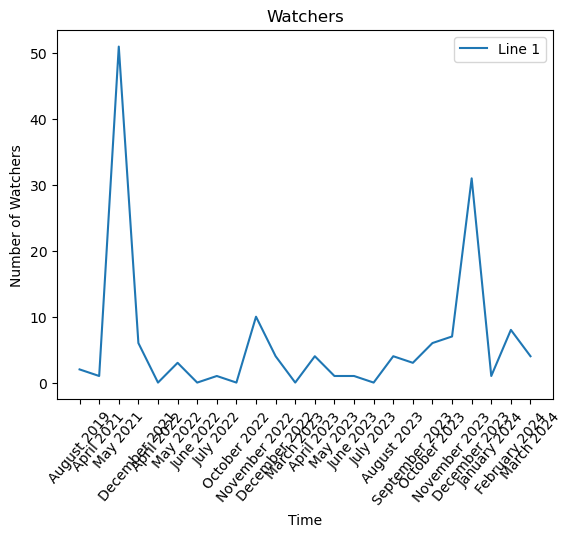

In [98]:
active['Month_Year'] = active['Date'].dt.strftime('%B %Y')

filtered_active = active.copy()

avg_sold = filtered_active.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = filtered_active.groupby(by='Month_Year').count()['Watchers']

total_sales = filtered_active.groupby(by='Month_Year').sum()['Watchers']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Listings': total_sold, 'Watchers': total_sales}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')



# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title(f'Avg_Sold')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Plotting the lines
plt.plot(trend_df.index, trend_df['Total_Listings'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Number of Listings')
plt.title(f'Total_Listings')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Plotting the lines
plt.plot(trend_df.index, trend_df['Watchers'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Number of Watchers')
plt.title(f'Watchers')
# Setting x-axis labels
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [81]:
trend_df

Avg_Sold  Total_Listings  Watchers       Date
Month_Year                                                    
August 2019     41.610000               1         2 2019-08-01
April 2021      44.850000               1         1 2021-04-01
May 2021        22.700000               2        51 2021-05-01
December 2021   35.245000               2         6 2021-12-01
April 2022      34.860000               1         0 2022-04-01
May 2022        30.980000               1         3 2022-05-01
June 2022       30.790000               1         0 2022-06-01
July 2022       26.080000               1         1 2022-07-01
October 2022    38.260000               1         0 2022-10-01
November 2022   23.980000               1        10 2022-11-01
December 2022   32.515000               2         4 2022-12-01
March 2023      39.235000               2         0 2023-03-01
April 2023      40.000000               1         4 2023-04-01
May 2023        35.690000               2         1 2023-05-01
June 2023       32.945000               2         1 2023-06-01
July 2023       29.813333               3         0 2023-07-01
August 2023     54.813750               8         4 2023-08-01
September 2023  32.303333               6         3 2023-09-01
October 2023    33.030000               7         6 2023-10-01
November 2023   26.340833              12         7 2023-11-01
December 2023   34.381667              24        31 2023-12-01
January 2024    35.790435              23         1 2024-01-01
February 2024   33.914634              41         8 2024-02-01
March 2024      34.920444              90         4 2024-03-01

In [86]:
active = pd.read_csv('educational_toys_active.csv')
active.head()

Unnamed: 0                                            Listing  \
0           0  , preview full size imageEducational Toys for ...   
1           1  , preview full size imageWooden Activity Cube ...   
2           2  , preview full size imageMontessori Toys for 1...   
3           3  , preview full size imageChristmas Toy for 2 Y...   
4           4  , preview full size imageEducational Toys for ...   

            Actions         Avg Sold Price  Watchers Promoted Bids  \
0  EditSell Similar    $31.68Free shipping         0      NaN    –   
1  EditSell Similar    $46.43Free shipping         0      NaN    –   
2  EditSell Similar    $67.99Free shipping         0      NaN    –   
3  EditSell Similar  $13.05+$2.19 shipping         0      NaN    –   
4  EditSell Similar   $9.80+$5.70 shipping         0        –    0   

     Start Date  
0  Mar 21, 2024  
1  Mar 21, 2024  
2  Mar 20, 2024  
3  Mar 20, 2024  
4  Mar 19, 2024

In [87]:


# Function to extract and format the first part of the string
def extract_and_format(value):
    parts = value.split('%')[0].split('$')[1]
    first_part = parts.strip()
    formatted_value = '{:.2f}'.format(float(first_part[1:]))
    return formatted_value
# Remove commas from all values in the DataFrame
active = active.replace(',', '', regex=True)
# 
active['Avg_Sold_Price'] = active['Avg Sold Price'].apply(lambda x: x.split('$')[1].split('F')[0].split('A')[0].split('+')[0]).astype(float)

# Convert string to datetime
active['Date'] = pd.to_datetime(active['Start Date'])

active['Watchers'] = active['Watchers'].astype(int)

active.drop(columns=['Unnamed: 0', 'Actions', 'Bids', 'Avg Sold Price', 'Promoted', 'Start Date'], inplace=True)

active['Listing'] = active['Listing'].apply(lambda x: x.split('image')[-1])

# Apply the function to both listing titles and descriptions
active['Title_Keywords'] = active['Listing'].apply(extract_keywords)
active

Listing  Watchers  \
0    Educational Toys for 1Year Old Toddlers Baby B...         0   
1    Wooden Activity Cube for 1 Year Old Kids Educa...         0   
2    Montessori Toys for 1 Year Old 8 in 1 Learning...         0   
3    Christmas Toy for 2 Year Old Kids Learning Toy...         0   
4    Educational Toys for 1Year Old Toddlers Baby B...         0   
..                                                 ...       ...   
295  Educational Learning Musical Toy for Baby Todd...        28   
296  Baby Tablet Educational Toy For 1-6 Year Old T...         0   
297  Learning & Educational Musical Toys Gift For K...        52   
298  Educational Learning Toys for 6 Months 1 2 3 Y...         8   
299  Educational Learning Toys for 6 Months 1 2 3 Y...         7   

     Avg_Sold_Price       Date  \
0             31.68 2024-03-21   
1             46.43 2024-03-21   
2             67.99 2024-03-20   
3             13.05 2024-03-20   
4              9.80 2024-03-19   
..              ...        ...   
295           14.01 2021-09-05   
296           11.65 2021-08-03   
297           28.15 2021-06-26   
298           17.99 2021-06-21   
299           17.99 2021-06-21   

                                        Title_Keywords  
0    [Educational, Toys, Old, Baby, Boy, Girl, Lear...  
1    [Wooden, Activity, Cube, Year, Old, Kids, Educ...  
2    [Montessori, Toys, Year, Old, Learning, Educat...  
3    [Christmas, Toy, Year, Old, Kids, Learning, To...  
4    [Educational, Toys, Old, Baby, Boy, Girl, Lear...  
..                                                 ...  
295  [Educational, Learning, Musical, Toy, Baby, To...  
296  [Baby, Tablet, Educational, Toy, 1-6, Year, Ol...  
297  [Learning, Educational, Musical, Toys, Gift, K...  
298  [Educational, Learning, Toys, Months, Years, O...  
299  [Educational, Learning, Toys, Months, Years, O...  

[300 rows x 5 columns]

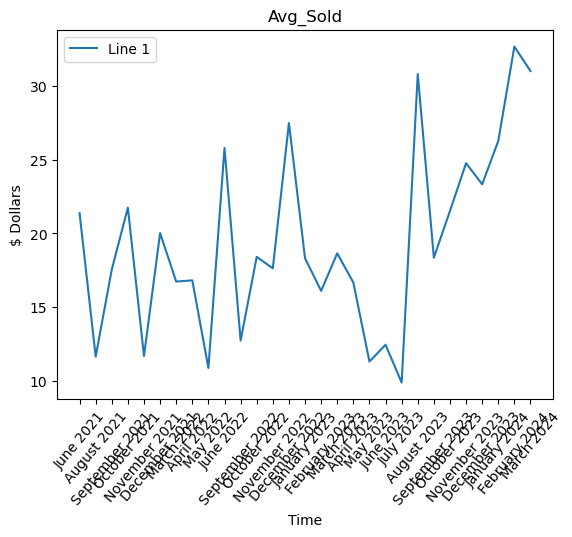

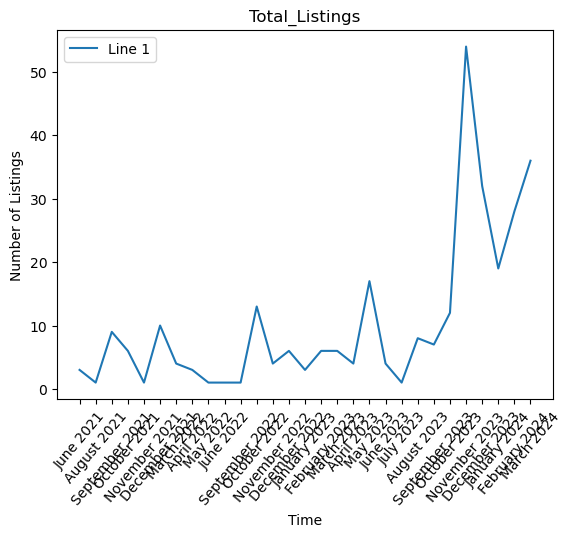

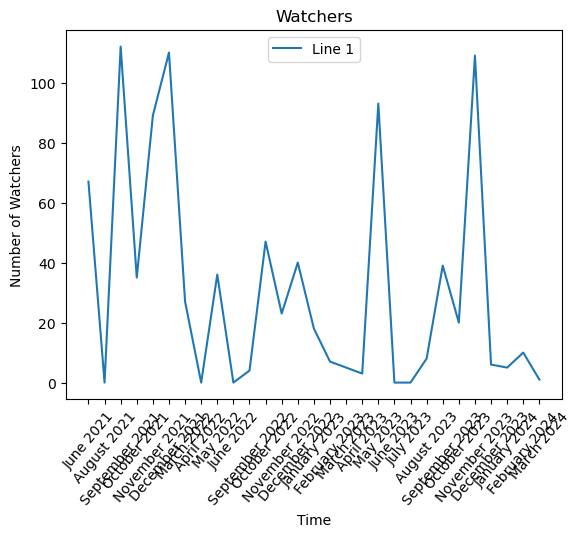

In [88]:
active['Month_Year'] = active['Date'].dt.strftime('%B %Y')

filtered_active = active.copy()

avg_sold = filtered_active.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = filtered_active.groupby(by='Month_Year').count()['Watchers']

total_sales = filtered_active.groupby(by='Month_Year').sum()['Watchers']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Listings': total_sold, 'Watchers': total_sales}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')

# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title(f'Avg_Sold')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Plotting the lines
plt.plot(trend_df.index, trend_df['Total_Listings'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Number of Listings')
plt.title(f'Total_Listings')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Plotting the lines
plt.plot(trend_df.index, trend_df['Watchers'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Number of Watchers')
plt.title(f'Watchers')
# Setting x-axis labels
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()